In [209]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Final Project
### Sulchan Yoon
### 2023-05-14

## Space Objects

There are many satellites and other systems that are classified within their respective Country of Origin and their related information may be limited or not available on this dataset. The dataset has last been updated as of 5/1/2022 and provided by the Union of Concerned Scientists through https://www.ucsusa.org/resources/satellite-database.

In [210]:
df = pd.read_csv("UCS-Satellite-Database-5-1-2022.csv", encoding = 'utf8')

Definition of Labels
Labels:

Name of Satellite, Alternate Names
Public name
Current Official Name of Satellite
Official name or project name
Country/Org of UN Registry
Country as registered with the United Nations. NR if not reported
Country of Operator/Owner
Country of operator/owner. NR if not reported
Operator/Owner
Organization who owns or operates. NR if not reported
Users
Sector of use
Purpose
Scope of purpose
Detailed Purpose
Additional details or secondary purpose
Class of Orbit
Orbit location
Type of Orbit
Shape or orbit path
Longitude of GEO (degrees)
Location if in GEO orbit
Perigee (km)
Closest distance to Earth within orbit
Apogee (km)
Furthest distance to Earth within orbit
Eccentricity
Amount of change as it relates to a circle
Inclination (degrees)
Orbital Inclination: Slope or angle between reference plane
Period (minutes)
Time to complete a single orbit
Launch Mass (kg.)
Mass of vehicle inclusive of propellant
Dry Mass (kg.)
Mass of vehicle exclusive of propellant
Power (watts)
Storage of power as beginning of life (BOL) if not indicated or end of life (EOL)
Date of Launch
Actual launch date
Expected Lifetime (yrs.)
Assumed value of the vehicle
Contractor
Main organization to research and develop the vehicle
Country of Contractor
Country for the contractor
Launch Site
Site of vehicle launch
Launch Location
Country of which the vehicle was launched. For Sea launches, they will be labelled as such.
Launch Vehicle
Rocket name used to launch the instrument or satellite
COSPAR Number
International identifier assigned to artificial objects in space as tracked by COSPAR (Committee on Space Research)
NORAD Number
Satellite identification number as tracked by NORAD (North American Aerospace Defense Command)
Comments
Additional comments on usage
Comments2
Additional comments on usage
Source Used for Orbital Data
Literature or IP disclosure from which the data was extracted from
Source
Source link
Source2
Additional source
Source3
Additional source
Source4
Additional source
Source5
Additional source
Source6
Additional source
Source7
Additional source

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5465 entries, 0 to 5464
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  5465 non-null   object 
 1   Current Official Name of Satellite  5465 non-null   object 
 2   Country/Org of UN Registry          4968 non-null   object 
 3   Country of Operator/Owner           5465 non-null   object 
 4   Operator/Owner                      5465 non-null   object 
 5   Users                               5465 non-null   object 
 6   Purpose                             5465 non-null   object 
 7   Detailed Purpose                    1140 non-null   object 
 8   Class of Orbit                      5465 non-null   object 
 9   Type of Orbit                       5465 non-null   object 
 10  Longitude of GEO (degrees)          5465 non-null   float64
 11  Perigee (km)                        5465 no

In [212]:
df.isnull().sum()

Name of Satellite, Alternate Names       0
Current Official Name of Satellite       0
Country/Org of UN Registry             497
Country of Operator/Owner                0
Operator/Owner                           0
Users                                    0
Purpose                                  0
Detailed Purpose                      4325
Class of Orbit                           0
Type of Orbit                            0
Longitude of GEO (degrees)               0
Perigee (km)                             0
Apogee (km)                              0
Eccentricity                             0
Inclination (degrees)                    0
Period (minutes)                         0
Launch Mass (kg.)                      240
 Dry Mass (kg.)                       5021
Date of Launch                           0
Expected Lifetime (yrs.)              1866
Contractor                               2
Country of Contractor                    2
Launch Site                              1
Launch Loca

In [213]:
df.drop(["Name of Satellite, Alternate Names","Current Official Name of Satellite","Country/Org of UN Registry","Operator/Owner","Detailed Purpose","Contractor","Country of Contractor","Launch Location","Launch Site","Launch Vehicle","COSPAR Number","NORAD Number", "Date of Launch", " Dry Mass (kg.) "], axis=1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5465 entries, 0 to 5464
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country of Operator/Owner   5465 non-null   object 
 1   Users                       5465 non-null   object 
 2   Purpose                     5465 non-null   object 
 3   Class of Orbit              5465 non-null   object 
 4   Type of Orbit               5465 non-null   object 
 5   Longitude of GEO (degrees)  5465 non-null   float64
 6   Perigee (km)                5465 non-null   int64  
 7   Apogee (km)                 5465 non-null   int64  
 8   Eccentricity                5465 non-null   float64
 9   Inclination (degrees)       5465 non-null   float64
 10  Period (minutes)            5465 non-null   float64
 11  Launch Mass (kg.)           5225 non-null   float64
 12  Expected Lifetime (yrs.)    3599 non-null   float64
dtypes: float64(6), int64(2), object(5

In [214]:
df.describe()

,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Expected Lifetime (yrs.)
count,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5225.000000,3599.000000
mean,2.295332,4711.681976,5388.042086,0.376015,63.018543,265.411733,746.259522,5.909906
std,30.299114,10979.442564,14297.830586,13.591620,29.601540,499.026104,1573.908306,4.021874
min,-179.800000,150.000000,49.000000,-0.033400,0.000000,9.000000,1.000000,0.250000
25%,0.000000,496.000000,514.000000,0.000223,53.000000,94.500000,120.000000,4.000000
50%,0.000000,548.000000,561.000000,0.000727,53.200000,95.600000,260.000000,4.000000
75%,0.000000,704.000000,791.000000,0.001150,97.300000,97.400000,260.000000,5.000000
max,359.000000,62200.000000,330000.000000,511.000000,143.400000,11520.000000,22500.000000,30.000000


In [215]:
print("Number of unique Country of Operator/Owners", len(df['Country of Operator/Owner'].unique()))
print("Number of unique Users", len(df['Users'].unique()))
print("Number of unique purposes", len(df['Purpose'].unique()))
print("Number of unique Classes of orbit", len(df['Class of Orbit'].unique()))
print("Number of unique Classes of Types of orbit", len(df['Type of Orbit'].unique()))


Number of unique Country of Operator/Owners 108
Number of unique Users 22
Number of unique purposes 32
Number of unique Classes of orbit 4
Number of unique Classes of Types of orbit 9


In [216]:
df.drop(["Country of Operator/Owner", "Launch Mass (kg.)", "Expected Lifetime (yrs.)"], axis=1, inplace= True)

In [217]:
df.isnull().sum()

Users                         0
Purpose                       0
Class of Orbit                0
Type of Orbit                 0
Longitude of GEO (degrees)    0
Perigee (km)                  0
Apogee (km)                   0
Eccentricity                  0
Inclination (degrees)         0
Period (minutes)              0
dtype: int64

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5465 entries, 0 to 5464
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Users                       5465 non-null   object 
 1   Purpose                     5465 non-null   object 
 2   Class of Orbit              5465 non-null   object 
 3   Type of Orbit               5465 non-null   object 
 4   Longitude of GEO (degrees)  5465 non-null   float64
 5   Perigee (km)                5465 non-null   int64  
 6   Apogee (km)                 5465 non-null   int64  
 7   Eccentricity                5465 non-null   float64
 8   Inclination (degrees)       5465 non-null   float64
 9   Period (minutes)            5465 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 427.1+ KB


In [219]:
X = df
y = df['Users']

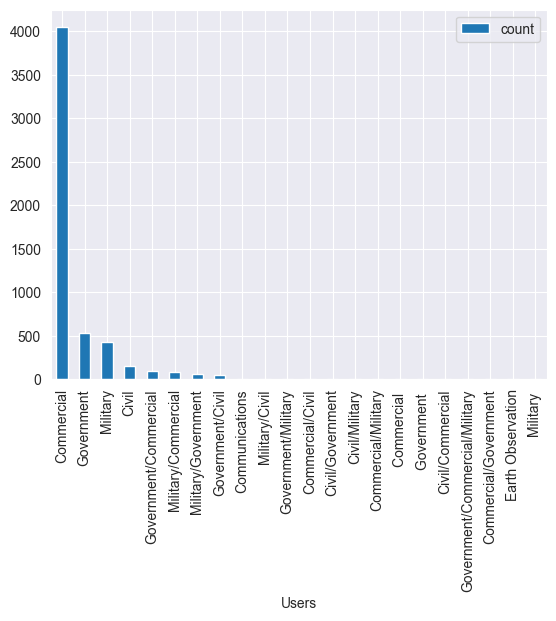

In [220]:
usersPlot = X["Users"].value_counts().reset_index()
usersPlot.plot(kind = "bar", x = "Users")
plt.show()

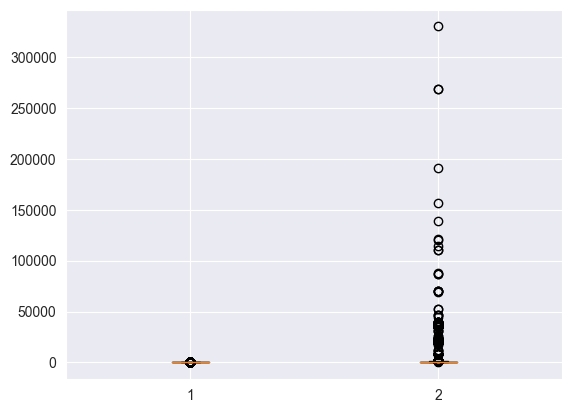

In [221]:
cols = [df["Eccentricity"],df["Apogee (km)"]]
fig, ax = plt.subplots()
ax.boxplot(cols)
plt.show()

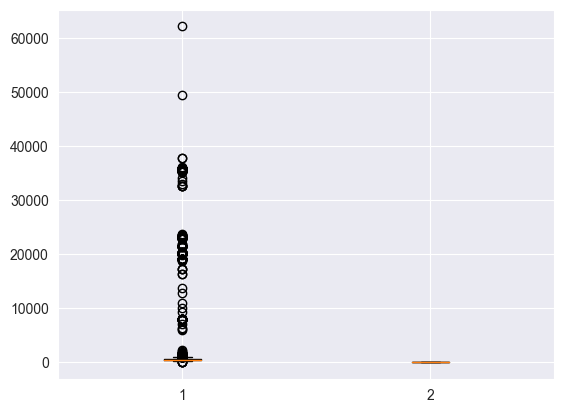

In [222]:
cols = [df["Perigee (km)"],df["Inclination (degrees)"]]
fig, ax = plt.subplots()
ax.boxplot(cols)
plt.show()

In [223]:
le = LabelEncoder()
X['Users'] = le.fit_transform(X['Users'])
X['Purpose'] = le.fit_transform(X['Purpose'])
X['Class of Orbit'] = le.fit_transform(X['Class of Orbit'])
X['Type of Orbit'] = le.fit_transform(X['Type of Orbit'])
y = le.fit_transform(y)

In [224]:
cols = X.columns
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns = [cols])
X.head()

,Users,Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes)
0,0.190476,0.193548,0.666667,0.625,0.333705,0.006704,0.001597,0.000067,0.257322,0.007565
1,0.000000,0.935484,0.666667,0.875,0.333705,0.005592,0.001418,0.000068,0.679568,0.007445
2,0.000000,0.193548,0.666667,0.875,0.333705,0.004706,0.001934,0.000100,0.684798,0.007549
3,0.190476,0.032258,0.333333,1.000,0.472903,0.574182,0.108331,0.000066,0.000558,0.123971
4,0.190476,0.032258,0.333333,1.000,0.194506,0.572925,0.108049,0.000065,0.000000,0.123977


In [225]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
kmeans.cluster_centers_

array([[2.82257828e-01, 1.71879857e-01, 6.71245985e-01, 7.13707197e-01,
        3.33720512e-01, 1.58533609e-02, 4.56273316e-03, 8.83077857e-04,
        4.89333146e-01, 9.93330964e-03],
       [4.34726271e-01, 1.35176651e-01, 3.19727891e-01, 9.95323129e-01,
        3.73166087e-01, 5.51784604e-01, 1.12548391e-01, 1.21633086e-04,
        2.57999364e-02, 1.24643064e-01]])

In [226]:
kmeans.inertia_
# Very high intertia value

927.5155836206106

In [227]:
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 152 out of 5465 samples were correctly labeled.
Accuracy score: 0.03


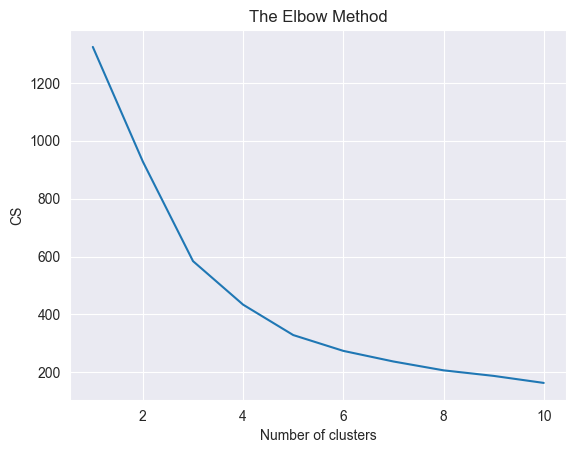

In [228]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [229]:
# It appears that k=3 and possibly k=5 are better options. Will check
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
# check how many of the samples were correctly labeled
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 47 out of 5465 samples were correctly labeled.
Accuracy score: 0.01


In [230]:
# It appears that k=3 and possibly k=5 are better options. Will check
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
# check how many of the samples were correctly labeled
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 43 out of 5465 samples were correctly labeled.
Accuracy score: 0.01


In [231]:
# The accuracy score is getting worse..

In [232]:
# It appears that k=3 and possibly k=5 are better options. Will check
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(X)
# check how many of the samples were correctly labeled
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 2433 out of 5465 samples were correctly labeled.
Accuracy score: 0.45


In [233]:
# It appears that k=3 and possibly k=5 are better options. Will check
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X)
# check how many of the samples were correctly labeled
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1288 out of 5465 samples were correctly labeled.
Accuracy score: 0.24
